# Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings

## Data Preparation for Beehive Image Analysis
Reads in the annotation file and creates a dataframe with the features.  Ensures all feature fields are numeric and replaces NaN values with 0

In [9]:
df = pd.read_csv("annotations.csv")
features = ['Wax Moth', 'Mold', 'Chalk Brood', 'Queen Marked', 'Queen Unmarked', 'Honey Capped', 'Nectar',
            'Drone Brood', 'Worker Brood', 'Eggs', 'Larvae', 'Queen Cells', 'Drawn Comb', 'Pollen', 'Foulbrood', 'Other']
metadata = ['Image Quality', 'Annotator 1', 'Annotator 2', 'Comment']
df_features = df[features]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
warnings.filterwarnings('ignore')

In [11]:
df_features['Drone Brood'] = pd.to_numeric(df_features['Drone Brood'], errors='coerce')
df_features['Other'] = pd.to_numeric(df_features['Other'], errors='coerce')

In [12]:
df_features.fillna(0, inplace=True)

In [13]:
df_features

,Wax Moth,Mold,Chalk Brood,Queen Marked,Queen Unmarked,Honey Capped,Nectar,Drone Brood,Worker Brood,Eggs,Larvae,Queen Cells,Drawn Comb,Pollen,Foulbrood,Other
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2967,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2968,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2969,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Feature Prevalence

In [14]:
feature_distribution = df_features.sum()

In [15]:
def at_the_bar(count, title, file):
  plt.figure(figsize=(14, 7))
  ax = sns.barplot(x=feature_distribution.index, y=feature_distribution.values, palette="coolwarm")
  plt.xticks(rotation=45, ha='right')
  plt.title(title, fontsize=16)
  plt.xlabel('', fontsize=12)

  for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

  plt.tight_layout()
  plt.savefig(file)
  plt.show()

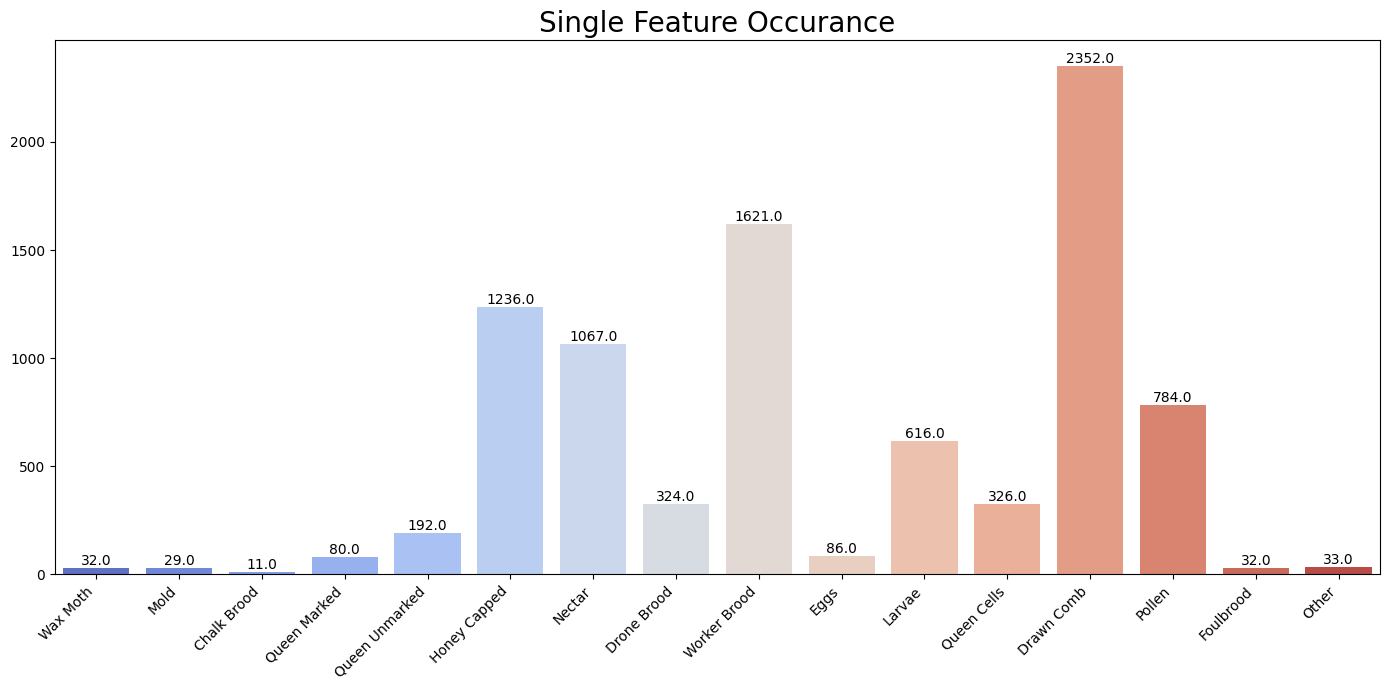

In [16]:
at_the_bar(feature_distribution, 'Single Feature Occurance', 'individual_feature_occurence.png')

In [ ]:
def create_combined_feature(row):
  return ''.join(map(str, row.astype(int)))

df_combined_features = df_features.copy()
df_combined_features['CombinedFeature'] = df_combined_features[features].apply(create_combined_feature, axis=1)

combined_feature_counts = df_combined_features['CombinedFeature'].value_counts()


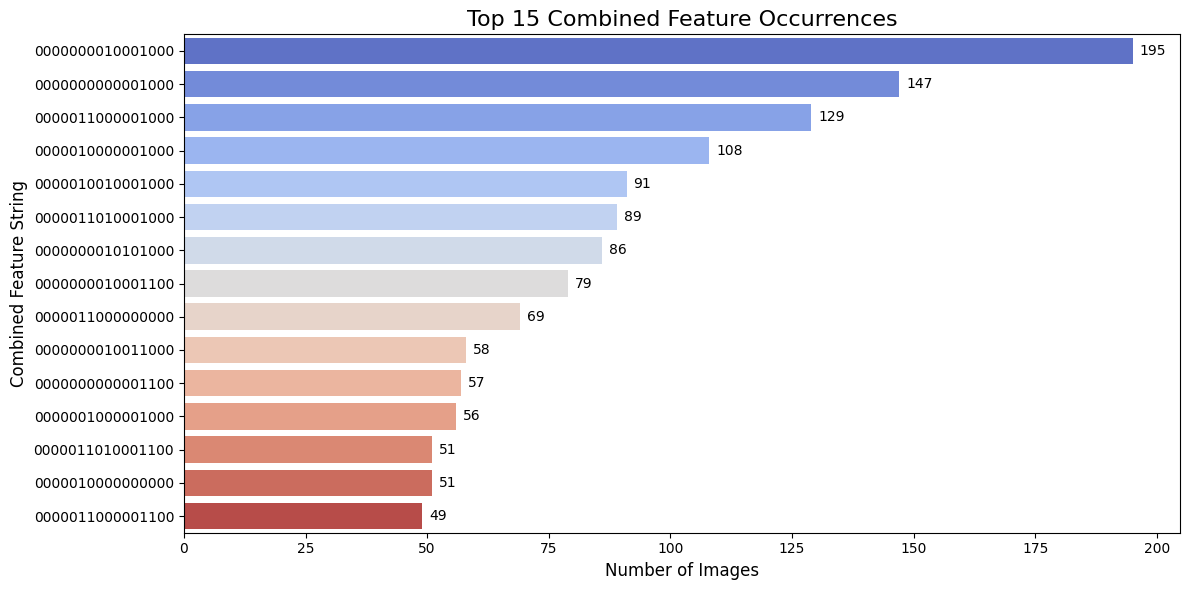

In [ ]:
combined_feature_counts = combined_feature_counts.sort_values(ascending=False)

top_15_features = combined_feature_counts.head(15)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_15_features.values, y=top_15_features.index, palette="coolwarm", orient='h')
plt.title('Top 15 Combined Feature Occurrences', fontsize=16)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Combined Feature String', fontsize=12)

for p in ax.patches:
  width = p.get_width()
  ax.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.savefig('top_15_combined_features.png')
plt.show()


In [ ]:
def get_present_features(combined_feature_string, features):
    present_features = []
    for i, bit in enumerate(combined_feature_string):
        if bit == '1':
            present_features.append(features[i])
    return present_features

top_15_df = pd.DataFrame({'CombinedFeature': top_15_features.index, 'Count': top_15_features.values})
top_15_df['PresentFeatures'] = top_15_df['CombinedFeature'].apply(lambda x: get_present_features(x, features))
top_15_df.to_csv('Top_15_Combined_Features.csv', index=False)
print(top_15_df)

     CombinedFeature  Count                                    PresentFeatures
0   0000000010001000    195                         [Worker Brood, Drawn Comb]
1   0000000000001000    147                                       [Drawn Comb]
2   0000011000001000    129                 [Honey Capped, Nectar, Drawn Comb]
3   0000010000001000    108                         [Honey Capped, Drawn Comb]
4   0000010010001000     91           [Honey Capped, Worker Brood, Drawn Comb]
5   0000011010001000     89   [Honey Capped, Nectar, Worker Brood, Drawn Comb]
6   0000000010101000     86                 [Worker Brood, Larvae, Drawn Comb]
7   0000000010001100     79                 [Worker Brood, Drawn Comb, Pollen]
8   0000011000000000     69                             [Honey Capped, Nectar]
9   0000000010011000     58            [Worker Brood, Queen Cells, Drawn Comb]
10  0000000000001100     57                               [Drawn Comb, Pollen]
11  0000001000001000     56                         

Feature Correlation

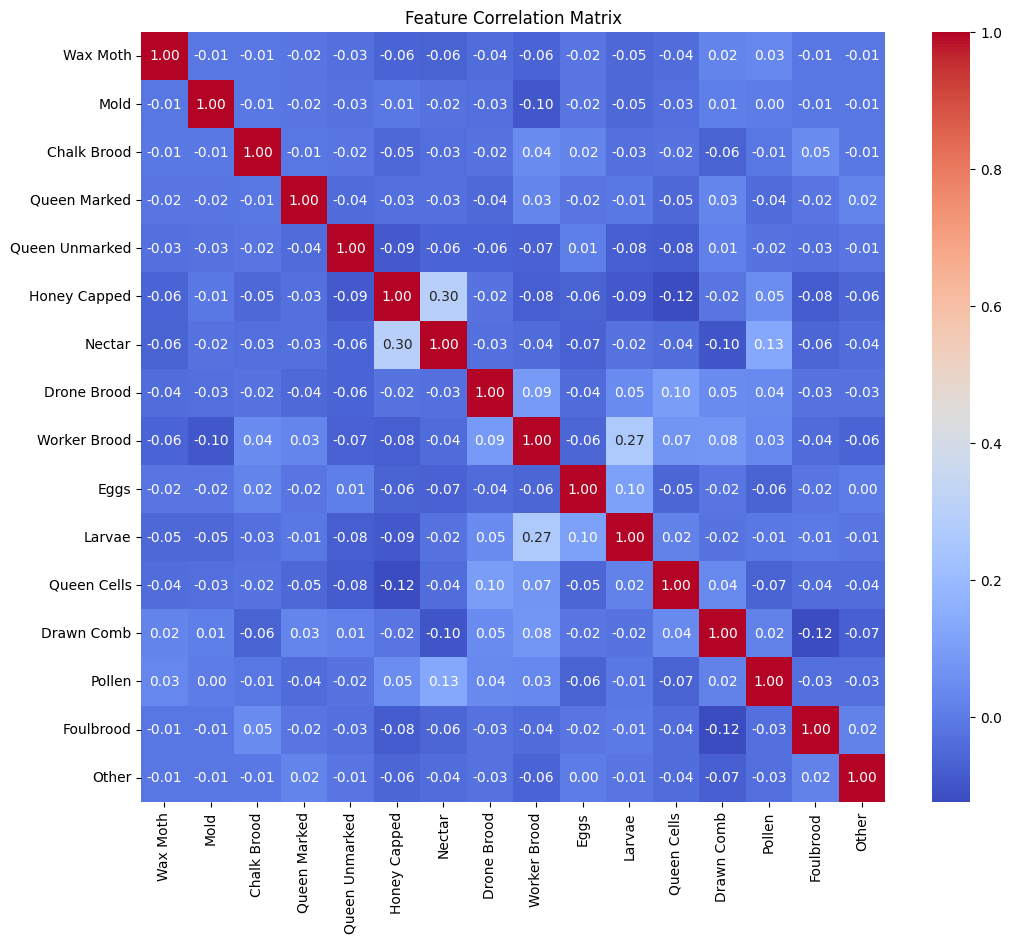

In [ ]:
# Phi Coefficient - Correlation Matrix to see what features tend to co-occur
correlation_matrix = df_features.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.savefig('feature_correlation_matrix.png')
plt.show()

Feature Counts

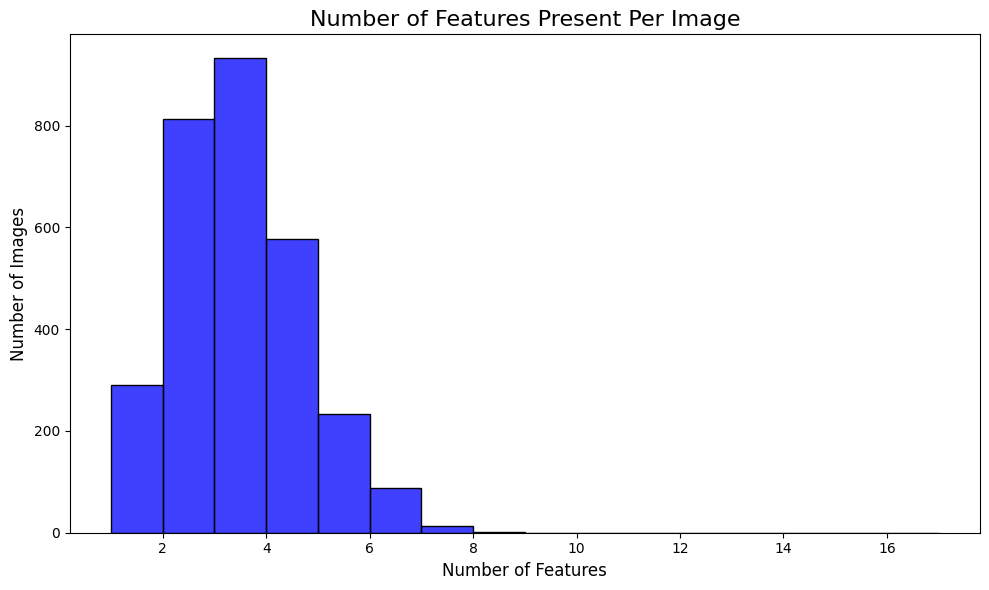

In [ ]:
features_per_image = df_features.sum(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(features_per_image, bins=range(1, df_features.shape[1] + 2), kde=False, color="blue")
plt.title('Number of Features Present Per Image', fontsize=16)
plt.xlabel('Number of Features', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.tight_layout()
plt.savefig('Number_of_features_per_image.png')
plt.show()

In [ ]:
average_features = features_per_image.mean()
print(f"Average number of features per image: {average_features:.2f}")

Average number of features per image: 2.97
